# Embedding Driven Text Analysis of Crease’s Stance Towards Chinese

Immigrants

prAxIs UBC Team <br> *Kaiyan Zhang, Irene Berezin, Alex Ronczewski*  
2025-08-04

### Library Loading

In [1]:
# This cell loads the necessary libraries for executing the notebook.
import pandas as pd
import numpy as np
import re
import umap
import textwrap
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from nltk import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import cosine
from transformers import AutoTokenizer, AutoModel, pipeline
import torch
import warnings
from collections import defaultdict, Counter
from typing import Dict, Any, Union

### Introduction

#### Overview of Historical Background

***The 1884 Chinese Regulation Act*** in British Columbia is widely
regarded as one of the most notorious discriminatory provincial laws
targeting Chinese immigration, it was challenged and ultimately declared
unconstitutional in the 1885 case of ***R v. Wing Chong*** by the judge
Henry Pering Pellew Crease. The Justice Crease found the legislation to
be unconstitutional on economic grounds; infringing on federal authority
over immigration, trade, commerce, treaty-making, and taxation.

The central figure in the ruling, *Henry Pering Pellew Crease*, came
from a wealthy English military family, and possessed a prestigious law
background.

-   His social identity was above-all English, and this was made clear
    in his politics.
-   He viewed Canada not as a new society to be built, but as an
    extension of the british empire.
-   He displayed mistrust towards Canadians, referring to them as “North
    American Chinamen”, afraid that they would “rule the country and job
    its offices” (Tina Loo).

In previous years, students expressed interest Crease’s opinion on the
1884 Chinese regulation act, given that the regulation act was strongly
condemned and ultimately struck down by Crease. However, this seems at
odds with Crease’s position on Chinese immigrants.

This raises an interesting question: **Did Judge Crease strike down the
act because of genuine anti-racism concerns, or because he saw the
Chinese immigrant labor force as a valuable asset for growing the
Canadian economy?**

#### Objective

-   We aim to explore this question by analyzing the language used by
    Justice Crease in his legal opinions and writings related to Chinese
    immigrants through **Natural Language Processing (NLP)** approaches.
    By examining the text, we hope to uncover insights into his stance.

-   The workshop is also to demonstrate how historians can use
    computational tools to *help* them answer such a research question,
    by showing each step in the research process.

-   In the end, we will be able to transform the text documents into
    something more intuitive and visually appealing, such as a 2D UMAP
    projection of the legal text embeddings by sentences. This can
    possibly help historians to better interpret the relationship
    between different texts.

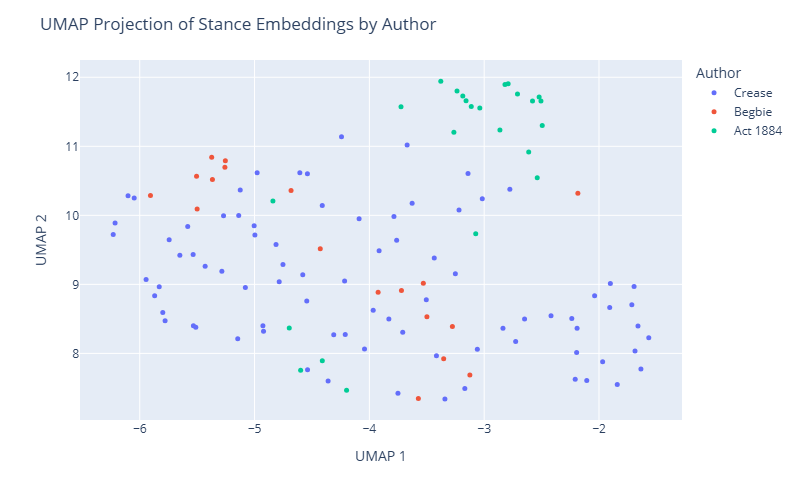

#### The Problem: Legal Text Analysis

Legal text analysis is itself a complex task, as legal documents are
often lengthy, dense, formal, and filled with specialized terminology.
They are also often written in neutral or passive voice, making it
difficult to discern the author’s personal opinions or biases, it poses
unique challenges for historians and legal scholars alike, which also
challenged the usual methods of natural language processing (NLP).

Mining insights from such texts requires sophisticated techniques to
extract meaningful information and identify patterns. We need the
technique to be able to: \* **Understand legal vocabulary**: Legal texts
often contain specialized terminology and complex sentence structures,
the technique should be able to handle legal jargon and formal language.
\* **Identify contextual semantics**: Legal texts often involve nuanced
meanings and interpretations, so the technique should be able to capture
the context and semantics of legal language. \* **Handle ambiguity**:
Legal texts can be ambiguous, with multiple interpretations possible,
the technique should be able to handle ambiguity and provide insights
into different interpretations. \* **Extract relevant topics**: Legal
texts often cover multiple topics and issues, the technique should be
able to extract relevant topics and themes from the text. \* **Analyze
sentiment**: Legal texts can convey different sentiments, such as
positive, negative, or neutral, the technique should be able to analyze
sentiment and provide insights into the author’s tone and attitude.

#### Research Approach

In this workshop, we will explore how to address these challenges using
a comparison approach, that is, while we focus on the text of Justice
Crease, we will compare it with other legal texts from the same period
to gain a better understanding of the language used in legal documents
at that time.

The first subject we will use for comparison is the ***1884 Chinese
Regulation Act***, which was the law that Crease struck down. The second
subject we will use for comparison is **Justice Matthew Baillie
Begbie**, who testified alongside Crease in the 1884 Royal Commission on
Chinese Immigration.

-   Unlike Crease, historical accounts describe Begbie as protective of
    marginalized peoples, particularly Indigenous communities and
    Chinese immigrants.
-   Similar to what Crease did to the Chinese Regulation Act, Begbie
    struck down discriminatory municipal by-laws in Victoria that
    targeted Chinese-owned businesses in the 1888 case of ***R v.
    Victoria***.

We use machine learning techniques, specifically text embeddings, to do
the following:

1.  Compile **a corpus of legal cases and commission reports** authored
    by contemporary judges concerning Chinese immigrants.
2.  Apply **Optical Character Recognition (OCR)** to the reports in
    order to convert them to a machine-readable format.
3.  Examine **keywords** in the texts, to compare the positions of
    different justices and regulations.
4.  Use **machine learning** to assess the relative emphasis on economic
    versus social justice concerns.
5.  Use **sentiment analysis** to evaluate the tone of the documents,
    focusing on whether they reflect positive, negative, or neutral
    sentiments, and compare the sentiments of writings by different
    authors to identify patterns.
6.  Use **zero-shot classification** to evaluate whether the documents
    reflect pro-discrimination, neutral, or anti-discrimination
    positions.

This approach demonstrates different techniques historians can use to
identify patterns in documents for analysis.

#### Data Collection and Preprocessing

We plan to use 10 digitalized texts, they are:

-   Legal Documents that address Chinese immigration in BC during the
    period:
    -   *R v. Wing Chong*
    -   *Wong Hoy Woon v. Duncan*
    -   *R v. Mee Wah, R v. Victoria*
    -   *Chinese Regulation Act, 1884*
-   Reports authored by Crease and Begbie for the Royal Commission that
    show the judges’ personal perspectives.
-   The remaining documents enrich our corpus for analysis and
    supplement our study.

A big issue with working with historical texts is the format they’re
stored in: usually scans of varying quality from physical books,
articles, etc. However, these are not machine-readable file formats
(e.g., text files), so our first step will be using **Optical Character
Recognition (OCR)** to convert the scanned images into machine-readable
text. We chose this approach because:

1.  It is a common technique for digitizing printed texts that is
    already widely used in legal case archives such as the CanLii
    database, and
2.  There are many OCR tools available that vary in cost, effectiveness,
    and ease of use.

Below is a brief overview of early and modern OCR techniques:

-   **Early OCR (Pattern Matching):**

    -   Compared each character image to a library of fonts and shapes.
    -   Worked well for clean, printed text.
    -   Struggled with handwriting, unusual fonts, or degraded scans.

-   **Modern OCR (Intelligent Recognition):**

    -   Uses AI to “read” text more like a human.
    -   Analyzes shapes, context, and layout.
    -   Handles messy, handwritten, or complex documents much better.

After testing several tools, we found that modern, AI-based OCR methods
produced the most accurate results for our historical documents.

#### Data Overview

After OCR, we obtained a `.csv` file containing the text and metadata of
the documents. Note that we removed the direct quotes of the *1884
Chinese Regulation Act* in Crease’s ruling, as they don’t reflect his
own language. The structure of the data is as follows: \| Column Name \|
Description \| \| —————————– \| ——————————————————– \| \| filename \|
Name of the file containing the document text. \| \| author \| Author of
the document (e.g., “Crease”, “Begbie”). \| \| type \| Document type
(e.g., “case”, “report”). \| \| text \| Full text of the document, which
may include OCR errors. \| \| act_quote_sentences_removed \| Number of
quoted sentences removed from the full text. \|

Here, we read the `.csv` file into a pandas DataFrame and display.

In [2]:
# Load the dataset
df = pd.read_csv("data/metadata_cleaned.csv")

df

We are also interested in the length of each document, as it can provide
insights into the depth and complexity of the text. Therefore, we create
a summary below quantifying the number of characters in each document.

In [3]:
# Summary the distribution of document lengths
# Create a DataFrame to store the document lengths
doc_lengths = []

# Measure lengths of each document by number of characters
for row in df.iterrows():
    text_length = len(row[1]['text'])
    doc_lengths.append({'Document': row[1]['filename'], 'Length': text_length})

# Convert to DataFrame and display
doc_lengths_df = pd.DataFrame(doc_lengths)
doc_lengths_df

### How Computers Interpret Text?

While computers can process text swiftly, they do not “understand” it in
the human sense. Instead, they build mathematical models of language
from statistical patterns and structural regularities. These models
produce symbolic and continuous representations of words and passages
that allow downstream algorithms to detect topics, relationships, and
affective signals. However, these representations remain proxies for
meaning rather than literal comprehension.

This process typically involves a sequence of steps:

1.  **Tokenization**: Breaking text into analyzable units (words,
    subwords, or sentences).

2.  **Preprocessing**: Cleaning and normalizing text (lowercasing,
    removing OCR noise, handling archaic spelling).

3.  **Vectorization**: Converting tokens or texts into numerical
    vectors.

    -   Simple count-based approaches (TF-IDF) capture term importance
        across documents.
    -   Modern contextual methods (BERT, Legal‑BERT) produce dense
        embeddings that capture usage-dependent semantics.

4.  **Modeling and Comparison**: Applying algorithms to those vectors.
    Examples include cosine similarity for semantic closeness, UMAP for
    visualization, and zero‑shot classification.

5.  **Aggregation and Interpretation**: Aggregating sentence- or
    snippet-level outputs to produce document- or author-level summaries
    (mean stance vectors, topic distributions), followed by careful
    human interpretation.

Why this is helpful for social science and humanities research:

-   **Scalability**: Enables analysis of large corpora beyond human
    reading capacity.
-   **Pattern Discovery**: Uncovers latent structures and relationships
    not easily seen by humans.
-   **Quantification**: Provides numerical measures of abstract concepts
    (e.g., sentiment, stance).
-   **Reproducibility**: Offers systematic, repeatable methods for text
    analysis.

#### Count Approach: TF-IDF

The **Term Frequency-Inverse Document Frequency (TF-IDF)** is a
statistical measure that evaluates the importance of a word in a
document relative to a collection of documents (corpus). It is one of
the earliest and most widely used methods for text analysis. It is
essentially a count-based approach that quantifies the importance of
words in a document based on their frequency and distribution across
multiple documents. TF-IDF works by calculating two components: 1.
**Term Frequency (TF)**: Measures how frequently a term appears in a
document. 2. **Inverse Document Frequency (IDF)**: Measures how
important a term is across the entire corpus, by considering how many
documents contain the term.

For our purpose, we can use TF-IDF to identify the most important words
in each document, which can help us understand the key themes and topics
discussed in the text. More details on what we are going to do:

1.  Regroup the text data into 5 groups:
    -   All writings
    -   Crease’s writings
    -   Begbie’s writings
    -   Chinese Regulation Act
    -   Other documents
2.  For each group, we will:
    -   Create a TF-IDF vectorizer to convert the text into numerical
        vectors.
    -   Remove common filler words (“the”, “and”, etc.).
    -   Calculate the TF-IDF scores for each word in the documents.
    -   Identify the most important words based on their TF-IDF scores.
3.  The most frequent remaining words can reveal the main topics of each
    case.

In [4]:
# Define the function to preprocess text in a DataFrame column
def preprocess_text(text_string):
    """
    Cleans and preprocesses text by:
    1. Converting to lowercase
    2. Removing punctuation and numbers
    3. Tokenizing
    4. Removing English stop words 
    5. Removing words with 4 or fewer characters
    """
    # Start with the standard English stop words
    stop_words = set(stopwords.words('english'))
    
    # Add custom domain-specific stop words if needed
    custom_additions = {'would', 'may', 'act', 'mr', 'sir', 'also', 'upon', 'shall'}
    stop_words.update(custom_additions)
    
    # Lowercase and remove non-alphabetic characters
    processed_text = text_string.lower()
    processed_text = re.sub(r'[^a-z\s]', '', processed_text)
    
    # Tokenize
    tokens = processed_text.split()
    
    # Filter out stop words AND short words in a single step
    filtered_tokens = [
        word for word in tokens 
        if word not in stop_words and len(word) > 4
    ]
    # Re-join the words into a single string
    return " ".join(filtered_tokens)

In [5]:
# Apply the function to create the 'processed_text' column
df['processed_text'] = df['text'].apply(preprocess_text)

# Display the first few rows of the processed text
df['processed_text'].head(5)

In [6]:
# Perform TF-IDF vectorization on the processed text

# Regrouping the DataFrame for better representation
df['group'] = 'Other'
df.loc[df['author'] == 'Crease', 'group'] = 'Crease'
df.loc[df['author'] == 'Begbie', 'group'] = 'Begbie'
df.loc[df['author'] == 'Others', 'group'] = 'Regulation Act'

# Load the vectorizer and transform the processed text
# This calculates IDF based on word rarity across ALL individual texts.
vectorizer = TfidfVectorizer(max_features=1000, ngram_range=(1, 3))
tfidf_matrix = vectorizer.fit_transform(df['processed_text'])

# Create a new DataFrame with the TF-IDF scores
feature_names = vectorizer.get_feature_names_out()
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

# Add the 'group' column to this TF-IDF DataFrame for aggregation
tfidf_df['group'] = df['group'].values

# Group by author and calculate the MEAN TF-IDF score for each word
mean_tfidf_by_group = tfidf_df.groupby('group').mean()

# Calculate TF-IDF for the combined corpus ("All") using the same vectorizer
processed_all = " ".join(df['processed_text'])
all_vec = vectorizer.transform([processed_all]).toarray().ravel()
all_series = pd.Series(all_vec, index=feature_names, name='All')

# Add the "All" row to the grouped TF-IDF DataFrame
mean_tfidf_by_group = pd.concat([all_series.to_frame().T, mean_tfidf_by_group], axis=0)

# Collect top words and arrange them into a side-by-side DataFrame
list_of_author_dfs = []
for group_name in ['All', 'Crease', 'Begbie', 'Regulation Act', 'Other']:
    if group_name not in mean_tfidf_by_group.index:
        # If a group is missing, append an empty frame to keep column alignment
        empty_df = pd.DataFrame({group_name: [], f'{group_name}_score': []})
        list_of_author_dfs.append(empty_df)
        continue

    # Get the top 10 terms and scores for the current author/group
    top_words = mean_tfidf_by_group.loc[group_name].sort_values(ascending=False).head(10)

    # Convert the Series to a DataFrame
    top_words_df = top_words.reset_index()
    top_words_df.columns = [group_name, f'{group_name}_score']

    list_of_author_dfs.append(top_words_df)

# Concatenate the list of DataFrames horizontally
final_wide_df = pd.concat(list_of_author_dfs, axis=1)

# Display the final combined DataFrame (includes "All")
final_wide_df

Undoubtedly, the TF-IDF practice on our corpus has identified some
interesting patterns, such as:

-   The emphasis on “Chinese” in all groups.
-   The emphasis on “labor” in Crease’s writings.
-   The emphasis on “license” in Begbie’s writings.
-   And the emphasis on “dollars” in the Chinese Regulation Act.
-   Other texts put “Canada” on the top of the list, and “legislation”
    right after “Chinese”.

However, this approach has limitations, as it does not capture the
semantic meaning of words or their relationships to each other. For
example, it cannot distinguish between “Chinese” as a noun and “Chinese”
as an adjective, or between “labor” as a noun and “labor” as a verb. It
also does not consider the context in which words are used, which can
lead to misinterpretation of their meaning.

#### Embedding Approach

With the advancement of machine learning, **text embeddings** emerged as
a more powerful technique for text analysis. It represents words or
phrases as dense vectors in a high-dimensional space, capturing semantic
relationships between them. This allows for more nuanced understanding
of text, enabling tasks like similarity measurement, clustering, and
classification.

There are several popular text embedding models, including: -
**Word2Vec**: A neural network-based model that learns word embeddings
by predicting context words given a target word (or vice versa). -
**GloVe**: A global vector representation model that learns word
embeddings by factorizing the word co-occurrence matrix. - **FastText**:
An extension of Word2Vec that represents words as bags of character
n-grams, allowing it to handle out-of-vocabulary words and capture
subword information. - **BERT**: A transformer-based model that
generates contextualized embeddings by considering the entire sentence
context, allowing it to capture word meanings based on their surrounding
words.

In this workshop, we will use a BERT-based model to generate text
embeddings for our corpus.
[nlpaueb/legal-bert-base-uncased](https://huggingface.co/nlpaueb/legal-bert-base-uncased)
is a BERT model pre-trained on English legal texts, including
legislation, law cases, and contracts. It is designed to capture the
legal language and semantics, making it suitable for our analysis.

However, we must note that the model is not perfect and may still have
limitations in understanding the nuances of legal language, especially
in historical texts.

### Word Embeddings

#### Creating Word Embeddings

While the model itself has the ability to generate word embeddings that
capture the semantic meaning of words, we still need to design our own
strategy to extract these meanings from our corpus.

-   Load LEGAL-BERT model and tokenizer.
-   Tokenize sentences into smaller subword units using a tokenizer.
-   Process each tokenized sentence through the model to extract hidden
    layer representations.
-   Combine subword embeddings to form a single vector for each word by
    averaging the embeddings of its subword components.
-   Aggregate embeddings for repeated words across sentences by
    averaging their vectors.
-   Return a dictionary mapping each word to its mean embedding,
    capturing its semantic meaning in the context of the text.

In this way, we are not only able to generate word embeddings with
contextual meanings over the whole corpus, but also be able to aggregate
our corpus into different groups, and generate contextualized word
embeddings for each group.

In [7]:
# We will use the Legal-BERT model for this task
tokenizer = AutoTokenizer.from_pretrained('nlpaueb/legal-bert-base-uncased')
model = AutoModel.from_pretrained('nlpaueb/legal-bert-base-uncased').eval() # set the model to evaluation mode

# Define a function to embed words using the tokenizer and model
def embed_words(sentences, tokenizer=tokenizer, model=model, target_words=None,
                device=None, max_length=512):
    """
    Returns a dictionary {word: mean_embedding}.
    Only the mean embedding (float32 numpy array) per word is kept.
    """
    if device is None:
        try:
            device = next(model.parameters()).device
        except Exception:
            device = torch.device("cpu")
    device = torch.device(device)
    model.to(device).eval()

    target_set = None if target_words is None else set(target_words)

    sums = {}   # word -> torch.Tensor sum of embeddings
    counts = {} # word -> occurrence count

    with torch.no_grad():
        for sent in sentences:
            enc = tokenizer(
                sent,
                return_tensors="pt",
                truncation=True,
                max_length=max_length
            )
            enc = {k: v.to(device) for k, v in enc.items()}
            outputs = model(**enc)
            hidden = outputs.last_hidden_state.squeeze(0)  # (seq_len, hidden)
            tokens = tokenizer.convert_ids_to_tokens(enc["input_ids"][0])

            i = 0
            while i < len(tokens):
                tok = tokens[i]
                if tok in ("[CLS]", "[SEP]", "[PAD]"):
                    i += 1
                    continue

                # Gather wordpieces
                j = i + 1
                piece_embs = [hidden[i]]
                word = tok[2:] if tok.startswith("##") else tok
                while j < len(tokens) and tokens[j].startswith("##"):
                    piece_embs.append(hidden[j])
                    word += tokens[j][2:]
                    j += 1

                if target_set is not None and word not in target_set:
                    i = j
                    continue

                word_emb = torch.stack(piece_embs, dim=0).mean(dim=0)
                if word in sums:
                    sums[word] += word_emb
                    counts[word] += 1
                else:
                    sums[word] = word_emb.clone()
                    counts[word] = 1
                i = j

    return {w: (sums[w] / counts[w]).cpu().numpy() for w in sums}

In [8]:
# Define a function to clean and preprocess text
def clean_text(text):
    
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    
    return text.strip()

In [9]:
warnings.filterwarnings("ignore")

nlp = spacy.load("en_core_web_sm")

# Group texts to form a single text per group
grouped_texts = df.groupby('group')['text'].apply(lambda x: ' '.join(x)).reset_index()

# Add a row for the combined text of all groups
grouped_texts = pd.concat(
    [grouped_texts, pd.DataFrame([{'group': 'All', 'text': ' '.join(df['text'])}])],
    ignore_index=True
)

# Create new columns for word and sentence tokens
grouped_texts['word_tokens'] = grouped_texts['text'].apply(lambda x: word_tokenize(clean_text(x)))
# Sentence tokenization using spaCy
grouped_texts['sentence_tokens'] = grouped_texts['text'].apply(lambda x: [sent.text for sent in nlp(x).sents])

# Apply clean_text to the sentence tokens
grouped_texts['sentence_tokens'] = grouped_texts['sentence_tokens'].apply(
    lambda x: [clean_text(sent) for sent in x]
)

In [10]:
# Embed the words in each group
grouped_texts['word_embeddings'] = grouped_texts['sentence_tokens'].apply(
    lambda x: embed_words(x)
    )

# Compute the number of unique words in each group
grouped_texts['num_unique_words'] = grouped_texts['word_tokens'].apply(lambda x: len(set(x)))

grouped_texts.head()

We created word embeddings of all tokens in each group, respectively.
The word embeddings are stored in a dictionary format, where each key is
a word and the value is its corresponding embedding vector.

It is clear that the word embeddings of the same word in different
groups are different, which reflects the contextualized meaning of the
word in each group.

-   For example, the word “Chinese” has a different embedding in
    Crease’s writings compared to Begbie’s writings, indicating that the
    two authors used the word in different contexts and with different
    connotations.
-   However, since they were embedded using the same model, the word
    embeddings of the same word in different groups are still similar,
    which reflects the shared meaning of the word across different
    contexts.
-   The dimensionality of all word embeddings is 768, which is the size
    of the hidden layer in the LEGAL-BERT model we used.

In [11]:
# Display the word embedding of Chinese for the whole corpus
chinese_embedding = grouped_texts[grouped_texts['group'] == 'All']['word_embeddings'].values[0].get('chinese')

# Display first 20 dimensions for brevity
print(f"First 20 Dimensions of Word Embedding for 'Chinese' in the Full Corpus:\n {chinese_embedding[:20]}\n")
print(f"Total Dimensions of Word Embedding for 'Chinese': {len(chinese_embedding)}\n")

In [12]:
# Display the word embedding of Chinese in Crease's text
crease_embeddings = grouped_texts[grouped_texts['group'] == 'Crease']['word_embeddings'].values[0]
# Display first 20 dimensions for brevity
print(f"First 20 Dimensions of Word Embeddings for 'Chinese' in Crease's Text:\n{crease_embeddings.get('chinese')[:20]}\n") 
print(f"Total Dimensions of Word Embeddings for 'Chinese' in Crease's Text: {len(crease_embeddings.get('chinese'))}\n")

In [13]:
begbie_embeddings = grouped_texts[grouped_texts['group'] == 'Begbie']['word_embeddings'].values[0]
# Display first 20 dimensions for brevity
print(f"First 20 Dimensions of Word Embeddings for 'Chinese' in Begbie's Text:\n{begbie_embeddings.get('chinese')[:20]}\n")
print(f"Total Dimensions of Word Embeddings for 'Chinese' in Begbie's Text: {len(begbie_embeddings.get('chinese'))}\n")

#### Measurement of Similarity

Another important aspect of word embeddings is the ability to measure
the similarity between words based on their embeddings. This can be done
using cosine similarity, which calculates the cosine of the angle
between two vectors in the embedding space. The cosine similarity ranges
from 0 to 1, where:

-   0 indicates no similarity (orthogonal vectors)
-   1 indicates perfect similarity (identical vectors)
-   The closer the cosine similarity is to 1, the more similar the words
    are in meaning.

This allows us to identify related words and concepts based on their
embeddings, enabling us to explore the semantic relationships between
words in our corpus. And more importantly, it doesn’t only allows us to
measure the similarity between words, but also allows us to measure the
similarity between sentences, paragraphs, and even entire documents, as
long as they are represented as vectors in the same embedding space.

The math behind cosine similarity is as follows: $$
\text{cosine similarity}(a, b) = \frac{a \cdot b}{||a|| \cdot ||b||}
$$ Where $a$ and $b$ are the embedding vectors of the two words, and
$||a||$ and $||b||$ are their Pythagorean norms (lengths).

Focusing on the word “Chinese”, we can calculate its cosine similarity
with other words in the same group to identify related terms. This can
help us understand how the word is used in different contexts and how it
relates to other concepts. Here, we will list out the top 10 most
similar words to “Chinese” in each group, along with their cosine
similarity scores.

**Note**: All words are put into lowercase.

In [14]:
# Compute top-10 most similar words to target for EVERY group (including "All")
target = "chinese"
top_n = 10
all_results = []
# Iterate through each group and compute similarities
for _, grp_row in grouped_texts.iterrows():
    group = grp_row['group']
    emb_dict = grp_row['word_embeddings']
    if target not in emb_dict:
        continue
    target_vec = emb_dict[target]
    sims = []
    for w, vec in emb_dict.items():
        if w == target:
            continue
        try:
            sim = 1 - cosine(target_vec, vec)
        except Exception:
            continue
        sims.append((w, sim))
    sims_sorted = sorted(sims, key=lambda x: x[1], reverse=True)[:top_n]
    for rank, (w, sim) in enumerate(sims_sorted, 1):
        all_results.append({'group': group, 'rank': rank, 'word': w, 'similarity': sim})  # Use :4f for better readability

similar_words_df = pd.DataFrame(all_results)

# Display the first few rows of the DataFrame with similar words
sims_wide = similar_words_df.pivot(index='rank', columns='group', values='similarity')
words_wide = similar_words_df.pivot(index='rank', columns='group', values='word')

# Combine with a tidy multi-level column index: 
wide_combined = pd.concat({'word': words_wide, 'similarity': sims_wide}, axis=1)
wide_combined = (
    wide_combined.swaplevel(0,1, axis=1)
                 .sort_index(axis=1, level=0)
)

wide_combined  # Display

### Embedding Driven Text Analysis

#### Creating Keyword-Focused Stance Embeddings

In comparison to generating word embeddings, modeling stance of each
text is more challenging, as it requires us to capture the author’s
position on a specific issue or topic. Oftentimes, the stance is not
explicitly stated in the text, but rather implied through the language
used.

There is not a universal optimum for stance modeling, as it depends on
the specific context and the author’s perspective. However, we can use a
combination of techniques to create focused embeddings that capture the
stance of each text. The strategy we used is as follows:

1.  Tokenize the text into smaller units and identify the positions of
    specific keywords or phrases that are relevant to the stance being
    analyzed.
2.  For each occurrence of the keywords, extract a surrounding “window”
    of text to capture the context in which the keywords are used.
3.  Represent the text in the window as numerical vectors using a
    pre-trained language model, which encodes the meaning of the words
    and their relationships.
4.  Combine the vectors within each window using a pooling method (e.g.,
    averaging or selecting the maximum value) to create a single
    representation for the context around the keyword.
5.  If multiple occurrences of the keywords are found, average their
    representations to create a unified vector that captures the overall
    stance in the text.
6.  If no keywords are found, use a fallback representation based on the
    overall text.

This approach thus allows us to create focused embeddings that capture
the stance of each text focusing on specific keywords or phrases. The
sentence is used as the basic unit of analysis here, but larger chunks
of text can also be used if needed.

In the end, we will store the lists of embeddings in a dictionary
format, where each key is the author and the value is a list of
embeddings for each text authored by that author.

In [15]:
def embed_text(
    text,
    focus_token=None,
    window=10,
    pooling="mean",  # "mean" (default), "max", or "min"
    tokenizer=tokenizer,
    model=model):

    # Get stopwords for filtering
    stop_words = set(stopwords.words('english'))
    
    # Run the model once
    inputs = tokenizer(text, return_tensors="pt", truncation=True)
    with torch.no_grad():
        outputs = model(**inputs)
    hidden = outputs.last_hidden_state.squeeze(0) 

    if focus_token is None:
        return hidden[0].cpu().numpy()
    
    # Normalize to list
    keywords = (
        [focus_token] if isinstance(focus_token, str)
        else focus_token
    )

    # Pre-tokenize each keyword to its subtoken ids
    kw_token_ids = {
        kw: tokenizer.convert_tokens_to_ids(tokenizer.tokenize(kw))
        for kw in keywords
    }

    input_ids = inputs["input_ids"].squeeze(0).tolist()
    tokens = tokenizer.convert_ids_to_tokens(input_ids)
    spans = []  # list of (start, end) index pairs

    # find every match of every keyword
    for kw, sub_ids in kw_token_ids.items():
        L = len(sub_ids)
        for i in range(len(input_ids) - L + 1):
            if input_ids[i:i+L] == sub_ids:
                spans.append((i, i+L))

    if not spans:
        # fallback on CLS vector
        return hidden[0].cpu().numpy()

    # For each span, grab the window around it
    vecs = []
    for (start, end) in spans:
        lo = max(1, start - window)
        hi = min(hidden.size(0), end + window)
        
        # Filter out stopwords from the window
        non_stop_indices = [i for i in range(lo, hi) 
                           if tokens[i] not in stop_words and not tokens[i].startswith('##')]
        
        # If all tokens are stopwords, use the original window
        if not non_stop_indices:
            span_vec = hidden[lo:hi]
        else:
            span_vec = hidden[non_stop_indices]
        
        if pooling == "mean":
            pooled = span_vec.mean(dim=0)
        elif pooling == "max":
            pooled = span_vec.max(dim=0).values
        elif pooling == "min":
            pooled = span_vec.min(dim=0).values
        else:
            raise ValueError(f"Unknown pooling method: {pooling}")
        
        vecs.append(pooled.cpu().numpy())

    # Average across all spans
    return np.mean(np.stack(vecs, axis=0), axis=0)

In [16]:
crease_cases = df[(df['author'] == 'Crease') & (df['type'] == 'case')]['text'].tolist()
begbie_cases = df[(df['author'] == 'Begbie') & (df['type'] == 'case')]['text'].tolist()
act_1884 = df[df['type'] == 'act']['text'].tolist()

act_dict = {
    'Crease': crease_cases,
    'Begbie': begbie_cases,
    'Act 1884': act_1884}

In [17]:
act_snippets = {}

keywords = ["Chinese", "China", "Chinaman", "Chinamen", 
            "immigrant", "immigrants", "alien", "aliens", 
            "immigration"]

for auth, texts in act_dict.items():
    snippets = []
    for txt in texts:
        # Sentence tokenize using Spacy
        sentence = [sent.text for sent in nlp(txt).sents]
        for sent in sentence:
            if any(keyword in sent for keyword in keywords):
                snippets.append(sent)
    act_snippets[auth] = snippets

In [18]:
# Investigate the length of the snippets
n_snippet = {auth: len(snippets) for auth, snippets in act_snippets.items()}

print("Snippet size by author:")
for auth, num in n_snippet.items():
    print(f"{auth}: {num}")

In [19]:
# Create embeddings
embeddings_dict = {'Crease': [], 'Begbie': [], 'Act 1884': []}

for auth, snippets in act_snippets.items():
    for snip in snippets:
        v = embed_text(snip, focus_token=keywords, window=15)
        embeddings_dict[auth].append(v) 

#### Measuring Stance Similarity

Just like word embeddings, cosine similarity can also be used to measure
the stance similarity between texts. The interpretation of cosine
similarity in this context is similar to that of word embeddings, where
a higher cosine similarity indicates a stronger alignment in stance
between two texts.

With sentence being the basic unit of analysis, we can calculate the
overall cosine similarity between each pair of authors’ texts in various
ways, but here we will focus on two of them: 1. **Mean Embeddings**: We
calculate the mean embedding for each author’s texts and then compute
the cosine similarity between these mean embeddings. This gives us a
single similarity score for each pair of authors, reflecting their
overall stance alignment. 2. **Pairwise Embeddings**: We calculate the
cosine similarity between each pair of texts authored by different
authors, then average the scores to get a more comprehensive view of
stance alignment across all texts.

Note that similarity scores are not deterministic, as they depend on the
specific texts and the context in which the keywords are used. However,
they can provide valuable insights into the stance of each author and
how it relates to other authors’ positions. This reinforces the idea
that **stance is not a fixed attribute**, but rather a dynamic and
context-dependent aspect of language.

In [20]:
# Compute the pairwise cosine similarity
mean_crease = np.mean(embeddings_dict["Crease"], axis=0, keepdims=True)
mean_begbie = np.mean(embeddings_dict["Begbie"], axis=0, keepdims=True)
mean_act_1884 = np.mean(embeddings_dict["Act 1884"], axis=0, keepdims=True)

sim_crease_begbie = cosine_similarity(mean_crease, mean_begbie)[0, 0]
sim_crease_act_1884 = cosine_similarity(mean_crease, mean_act_1884)[0, 0]
sim_begbie_act_1884 = cosine_similarity(mean_begbie, mean_act_1884)[0, 0]

print(f"Cosine similarity between mean Crease and mean Begbie: {sim_crease_begbie:.4f}")
print(f"Cosine similarity between mean Crease and mean Act 1884: {sim_crease_act_1884:.4f}")
print(f"Cosine similarity between mean Begbie and mean Act 1884: {sim_begbie_act_1884:.4f}")

In [21]:
# Extract embeddings for Crease, Begbie and the Act 1884
crease_embeddings = embeddings_dict["Crease"]
begbie_embeddings = embeddings_dict["Begbie"]
act_1884_embeddings = embeddings_dict["Act 1884"]

# Define a function to compute mean cosine similarity
def mean_cosine_similarity(embeddings1, embeddings2):
    similarities = [
        1 - cosine(e1, e2)
        for e1 in embeddings1
        for e2 in embeddings2
    ]
    return sum(similarities) / len(similarities)

# Extract embeddings
crease_emb = embeddings_dict["Crease"]
begbie_emb = embeddings_dict["Begbie"]
act_1884_emb = embeddings_dict["Act 1884"]

# Compute mean similarities
crease_begbie_sim = mean_cosine_similarity(crease_emb, begbie_emb)
crease_act_sim = mean_cosine_similarity(crease_emb, act_1884_emb)
begbie_act_sim = mean_cosine_similarity(begbie_emb, act_1884_emb)

# Output
print(f"Mean cosine similarity between Crease and Begbie embeddings: {crease_begbie_sim:.4f}")
print(f"Mean cosine similarity between Crease and Act 1884 embeddings: {crease_act_sim:.4f}")
print(f"Mean cosine similarity between Begbie and Act 1884 embeddings: {begbie_act_sim:.4f}")

#### Visualizing Text Embeddings

While the embeddings themselves are high-dimensional vectors (in our
case, 768-dimensional), we can visualize them in a lower-dimensional
space (e.g., 2D or 3D) using **dimensionality reduction** techniques
such as **UMAP** (Uniform Manifold Approximation and Projection).

**UMAP** is a dimensionality reduction technique that projects
high-dimensional embeddings into a 2D space while preserving local
structure, making it ideal for visualizing our embeddings.

Using **Plotly Express**, we create an interactive scatter plot where
each point represents a text snippet, colored by author, with hover
functionality to display the corresponding sentence. This visualization
highlights clusters and relationships between snippets, offering
insights into semantic similarities across authors.

In [22]:
# Set seed for umap reproducibility
all_vecs = np.vstack(embeddings_dict["Crease"] + embeddings_dict["Begbie"] + embeddings_dict["Act 1884"])
labels  = (["Crease"] * len(embeddings_dict["Crease"])) + (["Begbie"] * len(embeddings_dict["Begbie"])) + (['Act 1884'] * len(embeddings_dict["Act 1884"]))

reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=42)
proj = reducer.fit_transform(all_vecs) 

def wrap_text(text, width=60):
    return '<br>'.join(textwrap.wrap(text, width=width))

In [23]:
umap_df = pd.DataFrame(proj, columns=['UMAP 1', 'UMAP 2'])
umap_df['Author'] = labels
umap_df['Text'] = [snip for auth in act_snippets for snip in act_snippets[auth]]
umap_df['Text'] = umap_df['Text'].apply(lambda t: wrap_text(t, width=60))

fig = px.scatter(umap_df, x='UMAP 1', y='UMAP 2', 
                 color='Author', hover_data=['Text'], 
                 width=800, height=500 )
fig.update_traces(marker=dict(size=5))
fig.update_layout(title='UMAP Projection of Stance Embeddings by Author')
fig.show()

#### Investigating Texts

The stance embeddings ultimately serve as analytical tools to support
our text analysis objectives.

-   By calculating the “conceptual mean stance” for each author, we gain
    a quantitative basis for comparing the positions of different
    authors.
-   However, embeddings alone cannot fully capture the nuances of
    language or the complexity of an author’s stance. To truly
    understand the perspectives reflected in the texts, it is essential
    to investigate the sentences that are most similar to the conceptual
    average position of each author.

Here, we will examine the top 10 sentences with the highest stance
similarity to the mean stance of each author.

This approach allows us to delve deeper into the texts, uncovering how
the language used aligns with the calculated average stance and
providing richer insights into the authors’ positions on the issue of
Chinese immigrants.

In [24]:
# Print out the 10 most similar embedding sentences to Crease's mean embedding

crease_similarity_df = pd.DataFrame(columns=['Author', 'Text', 'Similarity Score'])

# Iterate through the embeddings and their corresponding sentences
for auth, snippets in act_snippets.items():
    for snippet, emb in zip(snippets, embeddings_dict[auth]):
        similarity = cosine_similarity(emb.reshape(1, -1), mean_crease)[0][0]
        crease_similarity_df.loc[len(crease_similarity_df)] = [auth, snippet, similarity]
        
# Sort by similarity score
crease_sorted_similarity = crease_similarity_df.sort_values(by='Similarity Score', ascending=False)

print("Top 10 most similar sentences to Crease's mean embedding:\n")
for _, row in crease_sorted_similarity.head(10).iterrows():
    wrapped_para = textwrap.fill(row['Text'], width=100)
    print(f"Author: {row['Author']}\nSentence: {wrapped_para}\nSimilarity Score: {row['Similarity Score']:.4f}\n")

In [25]:
# Print out the 10 most similar embedding sentences to Begbie's mean embedding

begbie_similarity_df = pd.DataFrame(columns=['Author', 'Text', 'Similarity Score'])

# Iterate through the embeddings and their corresponding sentences
for auth, snippets in act_snippets.items():
    for snippet, emb in zip(snippets, embeddings_dict[auth]):
        similarity = cosine_similarity(emb.reshape(1, -1), mean_begbie)[0][0]
        begbie_similarity_df.loc[len(begbie_similarity_df)] = [auth, snippet, similarity]
        
# Sort by similarity score
begbie_sorted_similarity = begbie_similarity_df.sort_values(by='Similarity Score', ascending=False)

print("Top 10 most similar sentences to Begbie's mean embedding:\n")
for _, row in begbie_sorted_similarity.head(10).iterrows():
    wrapped_para = textwrap.fill(row['Text'], width=100)
    print(f"Author: {row['Author']}\nSentence: {wrapped_para}\nSimilarity Score: {row['Similarity Score']:.4f}\n")

In [26]:
# Print out the 10 most similar embedding sentences to the Regulation Act's mean embedding

regulation_similarity_df = pd.DataFrame(columns=['Author', 'Text', 'Similarity Score'])

# Iterate through the embeddings and their corresponding sentences
for auth, snippets in act_snippets.items():
    for snippet, emb in zip(snippets, embeddings_dict[auth]):
        similarity = cosine_similarity(emb.reshape(1, -1), mean_act_1884)[0][0]
        regulation_similarity_df.loc[len(regulation_similarity_df)] = [auth, snippet, similarity]
        
# Sort by similarity score
regulation_sorted_similarity = regulation_similarity_df.sort_values(by='Similarity Score', ascending=False)

print("Top 10 most similar sentences to the Regulation Act's mean embedding:\n")
for _, row in regulation_sorted_similarity.head(10).iterrows():
    wrapped_para = textwrap.fill(row['Text'], width=100)
    print(f"Author: {row['Author']}\nSentence: {wrapped_para}\nSimilarity Score: {row['Similarity Score']:.4f}\n")

### Topic Modeling and Alignment Analysis

In [27]:
final_wide_df

In the TF-IDF analysis, we observed that the word “Chinese” was a
prominent term across all groups, indicating its centrality to the
discussions in all texts. Following the word “Chinese”, we also noticed
that “labor”, “white”, “legislation”, and “taxation” were all
significant terms reflected in all texts. This make us wonder: **How do
these topics relate to each other, and how do they align with the
stances of different authors?**

In natural language processing, **topic modeling** is a technique used
to identify and extract topics from a collection of documents. It
involves analyzing the words and phrases in the text to identify
patterns and themes that can be grouped together into topics.
Oftentimes, topic modeling are performed using unsupervised learning
algorithms such as Latent Dirichlet Allocation (LDA). However, these
methods may not be suitable for our corpus, as they require a large
amount of text data and may not capture the nuances of legal language.

Therefore, we will use a different approach to explore the topics in our
corpus, by leveraging the word embeddings we have already generated. The
strategy we will use is as follows:

1.  **Identify Key Terms**: We will focus on the key terms identified in
    the TF-IDF analysis, such as “Chinese”, “labor”, “white”,
    “legislation”, and “taxation”. These terms will serve as anchors for
    our topic analysis.
2.  **Calculate Cosine Similarity**: For each key term, we will
    calculate its cosine similarity with other words in the same group
    to identify related terms. This will help us understand how the key
    terms are used in different contexts and how they relate to other
    concepts.
3.  **Aggregate Related Terms**: We will aggregate the related terms for
    each key term to form a topic. This will allow us to identify the
    main topics discussed in each group and how they align with the
    stances of different authors.
4.  **Analyze Topic Alignment**: We will analyze the alignment of the
    identified topics with the stances of different authors. This will
    help us understand how the topics reflect the authors’ positions on
    the issue of Chinese immigrants.

In [28]:
# Define our target "topics"
target_words = ["labor", "legislation", "license", "taxation"]

# Find most similar words to the keywords using the "All" group embeddings
all_emb = grouped_texts.loc[grouped_texts['group'] == 'All', 'word_embeddings'].values
if len(all_emb) == 0:
    raise ValueError("No 'All' group found in grouped_texts")
all_emb = all_emb[0]

top_n = 10
results = {}

for target in target_words:
    target_vec = all_emb.get(target)
    if target_vec is None:
        # fill with NaN if target missing
        results[target] = [np.nan] * top_n
        continue

    sims = []
    for w, vec in all_emb.items():
        if w == target:
            continue
        try:
            sim = 1 - cosine(target_vec, vec)
        except Exception:
            continue
        sims.append((w, sim))

    sims_sorted = sorted(sims, key=lambda x: x[1], reverse=True)[:top_n]
    results[target] = [w for w, _ in sims_sorted]

# Create DataFrame with targets as columns and ranks as rows
similar_words_df = pd.DataFrame(results)
similar_words_df

In [29]:
# Create anchors for the topics
def create_anchor(topic, similar_df=similar_words_df, top_n=10):

    t = topic

    # collect words: topic + top_n similar words 
    similar_words = similar_df[t].astype(str).tolist()[:top_n]
    words = [t] + [w.lower() for w in similar_words]

    # deduplicate while preserving order
    seen = set()
    uniq_words = []
    for w in words:
        if w not in seen:
            seen.add(w)
            uniq_words.append(w)

    # embed each word and average
    vecs = []
    for w in uniq_words:
        emb = embed_text(w)  
        vecs.append(emb)

    return np.mean(np.stack(vecs, axis=0), axis=0)

In [30]:
# Create anchors for the topics
labor_anchor = create_anchor("labor")
legislation_anchor = create_anchor("legislation")
license_anchor = create_anchor("license")
taxation_anchor = create_anchor("taxation")

# Create a DataFrame to hold the anchors
anchors_df = pd.DataFrame({
    'Topic': ['labor', 'legislation', 'license', 'taxation'],
    'Anchor Vector': [labor_anchor, legislation_anchor, license_anchor, taxation_anchor]
})

anchors_df

In [31]:
# Calculate the cosine similarity between each anchor and the mean embeddings of Crease, Begbie, and the Act 1884
# Visualize the results as a box plot
def calculate_similarity(anchor, embeddings):
    return cosine_similarity(anchor.reshape(1, -1), embeddings).flatten()

# Create a DataFrame to hold the similarity scores
similarity_scores = {
    'Author': [],
    'Topic': [],
    'Text': [],
    'Similarity Score': []
}

for topic in anchors_df['Topic']:
    anchor_vector = anchors_df.loc[anchors_df['Topic'] == topic, 'Anchor Vector'].values[0]

    for author in ['Crease', 'Begbie', 'Act 1884']:
        emb_list = embeddings_dict.get(author, [])
        texts = act_snippets.get(author, [])

        if len(emb_list) == 0:
            continue

        embeddings = np.vstack(emb_list)
        sim_scores = calculate_similarity(anchor_vector, embeddings)

        for idx, score in enumerate(sim_scores):
            similarity_scores['Author'].append(author)
            similarity_scores['Topic'].append(topic)
            similarity_scores['Text'].append(texts[idx] if idx < len(texts) else "")
            similarity_scores['Similarity Score'].append(float(score))

# Convert to DataFrame
similarity_df = pd.DataFrame(similarity_scores)

In [32]:
# prepare authors and topics
preferred_order = ['Crease', 'Begbie', 'Act 1884']
authors = [a for a in preferred_order if a in similarity_df['Author'].unique()]
topics = list(similarity_df['Topic'].unique())[:4] 

# Color Blind friendly palette
author_palette = sns.color_palette("colorblind", n_colors=len(authors))

sns.set(style="whitegrid", context="notebook")
fig, axes = plt.subplots(2, 2, figsize=(8, 6), sharey=False)

for i in range(4):
    ax = axes.flat[i]
    if i < len(topics):
        topic = topics[i]
        df_t = similarity_df[similarity_df['Topic'] == topic]

        # draw boxplot
        sns.boxplot(
            data=df_t,
            x='Author',
            y='Similarity Score',
            order=authors,
            palette=author_palette,
            width=0.6,
            fliersize=0,
            ax=ax,
            boxprops=dict(linewidth=0.9),
            medianprops=dict(linewidth=1.1, color='black'),
            whiskerprops=dict(linewidth=0.9),
            capprops=dict(linewidth=0.9)
        )

        # compute per-author means and overlay them
        means = df_t.groupby('Author')['Similarity Score'].mean().reindex(authors)
        x_positions = list(range(len(authors)))
        # plot white diamond with black edge so it stands out on colored boxes
        ax.scatter(x_positions, means.values, marker='D', s=60,
                   facecolors='white', edgecolors='black', zorder=10)

        # robust y-limits 
        vals = df_t['Similarity Score'].dropna()
        if len(vals) == 0:
            ymin, ymax = -1.0, 1.0
        else:
            q1 = vals.quantile(0.25)
            q3 = vals.quantile(0.75)
            iqr = q3 - q1
            if iqr == 0:
                whisker_low = float(vals.min())
                whisker_high = float(vals.max())
            else:
                whisker_low = float(q1 - 1.5 * iqr)
                whisker_high = float(q3 + 1.5 * iqr)

            span = max(whisker_high - whisker_low, 1e-6)
            pad = max(span * 0.08, 0.03)
            ymin = max(-1.0, whisker_low - pad)
            ymax = min(1.0, whisker_high + pad)
            if ymin >= ymax:
                mid = float(vals.median())
                ymin = max(-1.0, mid - 0.05)
                ymax = min(1.0, mid + 0.05)

        ax.set_ylim(ymin, ymax)

        ax.set_title(f"Topic: {topic}", fontsize=12, weight='semibold')
        ax.set_xlabel('')
        ax.set_ylabel('Cosine Similarity' if i % 2 == 0 else '')
        ax.axhline(0.0, color='grey', linestyle='--', linewidth=0.8, alpha=0.6)
        ax.tick_params(axis='x', rotation=0, labelsize=10)
        ax.tick_params(axis='y', labelsize=9)
        for spine in ax.spines.values():
            spine.set_linewidth(0.8)
        sns.despine(ax=ax, trim=True, left=False, bottom=False)
    else:
        ax.set_visible(False)

# Single legend for authors
legend_handles = [Patch(facecolor=author_palette[idx], label=authors[idx]) for idx in range(len(authors))]
fig.legend(handles=legend_handles, title='Author', loc='upper right', frameon=True)

plt.tight_layout(rect=[0, 0, 0.95, 0.96])
fig.suptitle('Topic Similarity by Author\n(Mean Labeled by Diamond)', fontsize=14, y=0.99)
plt.show()

### LLM and Zero-Shot Classification

Another powerful technique for text analysis is **zero-shot
classification**, which allows us to classify text into predefined
categories without requiring labeled training data, with the help of
large language models (LLMs). This approach is particularly useful when
we have a limited amount of labeled data or when the categories are not
well-defined.

In addition to classifying text into specific categories, zero-shot
classification can also be used to evaluate the stance of a text towards
a particular issue or topic by **calculating the probability of the text
belonging to each category**, the calculated probabilities will sum to 1
and they can be interpreted as the model’s confidence in each category.
In this workshop, we mainly focus on the second aspect, which allows us
to assess the stance of each text.

We will use the Hugging Face Transformers library to implement zero-shot
classification using a pre-trained model **facebook/bart-large-mnli**.
The model is trained on the Multi-Genre Natural Language Inference
(MultiNLI) dataset, which contains pairs of sentences labeled with their
relationship (pros, cons, or neutral). This allows the model to learn
how to classify text based on its semantic meaning and context, which is
particularly useful for our analysis of historical texts.

The key steps in our zero-shot classification process are as follows:

1.  **Define the zero-shot pipeline**: We create a zero-shot
    classification pipeline using the pre-trained model and tokenizer
    from Hugging Face Transformers, and specify a hypothesis template
    “In this snippet of a historical legal text, the author {}” that
    will be used to generate hypotheses for classification.
2.  **Define the candidate labels**: We define a set of candidate labels
    that represent the stance categories we want to classify the text
    into, which correspond to the basic stance categories we are
    interested in, such as “pro”, “neutral” or “cons” the equal rights
    of Chinese immigrants.
3.  **Classify the text**: We apply the zero-shot classification
    pipeline to each text in our corpus, generating a probability
    distribution over the candidate labels for each text.
4.  **Investigate the results**: We analyze the classification results
    to identify the stance of each text, focusing on the highest
    probability label for each text. We also calculate the average
    probability for each candidate label across all texts to compare the
    overall stance of different authors and documents.

In [33]:
# Create the full snippets dictionary
act_1884_full = " ".join(act_1884)
crease_cases_full = " ".join(crease_cases)
begbie_cases_full = " ".join(begbie_cases)

full_cases = {"Crease": crease_cases_full, "Begbie": begbie_cases_full, "Act 1884": act_1884_full}

In [34]:
# We create a dictionary to hold the full snippets for each author
full_snippets = {}
for author, text in full_cases.items():
    # Tokenize using Spacy
    sentence = [sent.text for sent in nlp(text).sents]
    snippets = []
    for sent in sentence:
        if len(sent) > 30:  # Filter out short and meaningless sentences created by tokenization
            snippets.append(sent)
            
    full_snippets[author] = snippets

In [35]:
# Create a DataFrame to display snippet size by author
snippet_sizes = [{'Author': auth, 'Snippet Count': len(snippets)} for auth, snippets in full_snippets.items()]
snippet_sizes_df = pd.DataFrame(snippet_sizes)

# Display the DataFrame
print(snippet_sizes_df)

To ensure that the zero-shot classification results are meaningful, we
carefully treat the candidate labels as prompts that guide the model’s
understanding of the stance categories. This allows us to leverage the
model’s ability to generalize and adapt to new tasks without requiring
extensive retraining or fine-tuning. Here, we will use the following
candidate labels: - Pro: “… advocates for equal legal treatment of
Chinese immigrants compared to white or European settlers, opposing
racial discrimination” - Neutral: “… describes or retells the status or
treatment of Chinese immigrants without expressing support or opposition
to racial inequality, is unrelated to Chinese immigrants, or cannot be
classified as either” - Cons: “… justifies or reinforces unequal legal
treatment of Chinese immigrants relative to white or European settlers,
supporting racially discriminatory policies”

However, we must note that this is also a major limitation of the
zero-shot classification approach, as it relies on the quality and
relevance of the candidate labels to the text being classified. If the
labels are not well-defined or do not accurately reflect the stance
categories, the classification results may be misleading or inaccurate.
This is particularly important when working with historical texts, where
the language and context may differ significantly from modern usage.
Therefore, it is essential to carefully select and define the candidate
labels to ensure that they accurately reflect the stance categories we
are interested in.

In [36]:
# Create pipeline for zero-shot classification with error handling and efficiency improvements
warnings.filterwarnings("ignore")

zero_shot = pipeline(
    "zero-shot-classification",
    model="MoritzLaurer/DeBERTa-v3-large-mnli-fever-anli-ling-wanli",
    tokenizer="MoritzLaurer/DeBERTa-v3-large-mnli-fever-anli-ling-wanli",
    hypothesis_template="In this snippet of a historical legal text, the author {}.",
    device=0 if torch.cuda.is_available() else -1  # Use GPU if available
)


# Simplified and clearer labels for better classification
labels = [
    "advocates for equal legal treatment of Chinese immigrants compared to white or European settlers, opposing racial discrimination",
    "describes or retells the status or treatment of Chinese immigrants without expressing support or opposition to racial inequality, is unrelated to Chinese immigrants, or cannot be classified as either",
    "justifies or reinforces unequal legal treatment of Chinese immigrants relative to white or European settlers, supporting racially discriminatory policies"
]

def get_scores(snippet, max_length=512):
    # Ensure snippet is not empty and is reasonable length
    if not snippet or len(snippet.strip()) < 10:
        return {label: 0.33 for label in labels}  # Return neutral scores for empty/short text

    # Truncate if too long to avoid token limit issues
    if len(snippet) > max_length * 4:  
        snippet = snippet[:max_length * 4]

    # Run classification
    out = zero_shot(snippet, candidate_labels=labels, truncation=True, max_length=max_length)

    # Create score dictionary
    score_dict = dict(zip(out["labels"], out["scores"]))

    # Ensure all labels are present
    for label in labels:
        if label not in score_dict:
            score_dict[label] = 0.0

    return score_dict

We can test the zero-shot classification pipeline on a sample text to
see how it works. For example, we can use a paragraph from Sir
Chapleau’s report to the Royal Commission on Chinese immigration:

> That assuming Chinese immigrants of the laboring class will persist in
> retaining their present characteristics of Asiatic life, where these
> are strikingly peculiar and distinct from western, and that the influx
> will continue to increase, this immigration should be dealt with by
> Parliament ; but no legislation should be such as would give a shock
> to great interests and enterprises established before any probability
> that Parliament would interfere with that immigration arose. Questions
> of vested rights might come up, and these ought to be carefully
> considered before action is taken.

In [37]:
# Define the snippet
chapleau_snippet = "That assuming Chinese immigrants of the laboring class will persist in retaining their present characteristics of Asiatic life, where these are strikingly peculiar and distinct from western, and that the influx will continue to increase, this immigration should be dealt with by Parliament; but no legislation should be such as would give a shock to great interests and enterprises established before any probability that Parliament would interfere with that immigration arose. Questions of vested rights might come up, and these ought to be carefully considered before action is taken."

# Get the scores for the snippet
chapleau_scores = get_scores(chapleau_snippet)

# Display the scores
print("Classification Scores for Chapleau's Snippet:")
for label, score in chapleau_scores.items():
    print(f"{score:.4f}: {label}")

#### Sentence Approach

Another limitation of the zero-shot classification is that the number of
tokens in the text is limited, which means that we cannot classify the
entire text at once if it exceeds the token limit. To avoid exceeding
the token limit, we can split the text into smaller chunks, such as
sentences or windows of text, and classify each chunk separately.

The **sentence approach** is to classify each sentence in the text
separately, which allows us to capture the stance of each sentence and
its relationship to the overall text. This approach is particularly
useful when the text is long or complex, as it allows us to analyze the
stance of each sentence in isolation.

However, it has limitations in understanding the overall stance of the
text, as it does not consider the context in which the sentences are
used and therefore may capture too much variation in the stance of the
text.

In [38]:
# # Run zero-shot classification on the snippets from the Chinese Regulation Act 1884
# act_scores = {}

# for auth, snippets in full_snippets.items():
#     scores = []
#     for snip in snippets:
#         score = get_scores(snip)
#         scores.append(score)
#     act_scores[auth] = scores

# rows = []

# for auth, snippets in full_snippets.items():
#     for snip, score_dict in zip(snippets, act_scores[auth]):
#         row = {
#             "Author": auth,
#             "Text": snip,
#             "Pro": score_dict[labels[0]],
#             "Neutral": score_dict[labels[1]],
#             "Cons": score_dict[labels[2]]
#         }
#         rows.append(row)

# # Create DataFrame to store the scores
# df_scores = pd.DataFrame(rows)

# # Save the DataFrame to a CSV file
# df_scores.to_csv("data/zero_shot_sentence_scores.csv", index=False)

In [39]:
# Read the saved DataFrame
df_scores = pd.read_csv("data/zero_shot_sentence_scores.csv")

# Print out the top 10 sentences with the highest "Pro" scores
top_pro_sentences = df_scores.nlargest(10, 'Pro')

print("\nTop 10 sentences with the highest 'Pro' scores:\n")

for _, row in top_pro_sentences.iterrows():
    wrapped_para = textwrap.fill(row['Text'], width=100)
    print(f"Author: {row['Author']}\nSentence: {wrapped_para}\nPro Score: {row['Pro']:.4f}\n")

In [40]:
# Print out the top 10 sentences with the highest "Cons" scores
top_cons_sentences = df_scores.nlargest(10, 'Cons')

print("\nTop 10 sentences with the highest 'Cons' scores:\n")

for _, row in top_cons_sentences.iterrows():
    wrapped_para = textwrap.fill(row['Text'], width=100)
    print(f"Author: {row['Author']}\nSentence: {wrapped_para}\nCons Score: {row['Cons']:.4f}\n")

In [41]:
# Group by author and calculate mean scores
mean_scores = df_scores.groupby("Author")[["Pro", "Neutral", "Cons"]].mean()
median_scores = df_scores.groupby("Author")[["Pro", "Neutral", "Cons"]].median()

print("Mean scores by author:")
print(mean_scores)

print("\nMedian scores by author:")
print(median_scores)

In [42]:
df_scores['Wrapped Text'] = df_scores['Text'].apply(lambda t: wrap_text(t, width = 50))

fig = px.scatter(
    df_scores,
    x="Pro",
    y="Cons",
    color="Author",
    hover_data=["Wrapped Text"],
    title="Pros vs Cons Scores by Author",
    width=800,
    height=600
)

fig.update_traces(marker=dict(size=5))
fig.show()

#### Window Approach

In comparison to the sentence approach, the **window approach** is to
classify larger chunks of text that contain multiple sentences with an
overlapping context between windows. This allows us to capture the
stance of the text in a more holistic way, while still being able to
classify each window separately.

The limitation of this approach is that it may not capture the nuances
of each sentence, as it treats the window containing multiple sentences
as a single unit. However, it allows us to capture the overall stance of
the text while still being able to classify each window separately.

Here, we define the function to split the text into overlapping windows
of a specified size (maximum number of tokens) with a certain overlap
(stride that overlap between consecutive windows). We then apply the
zero-shot classification pipeline to each window and average the results
to obtain the final classification for the entire text.

In [43]:
# Define a function to chunk text into overlapping windows
def chunk_into_windows(text, max_tokens=512, stride=128):
    
    # Break into sentences first for cleaner boundaries
    sents = sent_tokenize(text)
    windows = []
    current = ""
    for sent in sents:
        # Tentative window if we add this sentence
        cand = current + " " + sent if current else sent
        # Count tokens
        n_tokens = len(tokenizer.encode(cand, add_special_tokens=False))
        if n_tokens <= max_tokens:
            current = cand
        else:
            # finalize current window, then start new from overlapping tail
            windows.append(current)
            # keep the stride tokens from the end of the current window
            tail_ids = tokenizer.encode(current, add_special_tokens=False)[-stride:]
            tail_text = tokenizer.decode(tail_ids)
            current = tail_text + " " + sent
    if current:
        windows.append(current)
    return windows

In [44]:
# # Run classification per author
# rows = []
# for author, text in full_cases.items():
    
#     windows = chunk_into_windows(text, max_tokens=256, stride=64)
    
#     # classify each window
#     for win in windows:
#         out = zero_shot(win, candidate_labels=labels, truncation=True, max_length=256)
#         # Extract scores and labels
#         score_dict = dict(zip(out["labels"], out["scores"]))
#         rows.append({
#             "Author": author,
#             "Text": win,
#             "Pro": score_dict[labels[0]],
#             "Neutral": score_dict[labels[1]],
#             "Cons": score_dict[labels[2]]
#         })

# all_scores = pd.DataFrame(rows)

# # Save the DataFrame to a CSV file
# all_scores.to_csv("data/zero_shot_windowed_scores.csv", index=False)

In [45]:
# Read the saved DataFrame
all_scores = pd.read_csv("data/zero_shot_windowed_scores.csv")

# Print out the top 5 windows with the highest "Pro" scores
top_pro_windows = all_scores.nlargest(5, 'Pro')

print("\nTop 5 windows with the highest 'Pro' scores:\n")
for _, row in top_pro_windows.iterrows():
    wrapped_para = textwrap.fill(row['Text'], width=100)
    print(f"Author: {row['Author']}\nWindow: {wrapped_para}\nPro Score: {row['Pro']:.4f}\n")

In [46]:
# Print out the top 5 windows with the highest "Cons" scores
top_cons_windows = all_scores.nlargest(5, 'Cons')

print("\nTop 5 windows with the highest 'Cons' scores:\n")
for _, row in top_cons_windows.iterrows():
    wrapped_para = textwrap.fill(row['Text'], width=100)
    print(f"Author: {row['Author']}\nWindow: {wrapped_para}\nCons Score: {row['Cons']:.4f}\n")

In [47]:
# Calculate the mean scores and median scores for each author
mean_scores = all_scores.groupby("Author")[["Pro", "Neutral", "Cons"]].mean()
median_scores = all_scores.groupby("Author")[["Pro", "Neutral", "Cons"]].median()

print("Mean scores by author:")
print(mean_scores)

print("\nMedian scores by author:")
print(median_scores)

In [48]:
all_scores['Text'] = all_scores['Text'].apply(lambda t: wrap_text(t, width = 50))

fig = px.scatter(
    all_scores,
    x="Pro",
    y="Cons",
    color="Author",
    hover_data=["Text"],
    title="Pros vs Cons Scores by Author",
    width=800,
    height=600
)

fig.update_traces(marker=dict(size=5))
fig.show()

While both approach successfully identified that the Chinese Regulation
Act of 1884 was more discriminatory towards Chinese people, and the
relative positions of the three authors matched our expectations, we
note that the zero-shot classification results are not deterministic, as
they still depend on the specific language used in defining the
candidate labels and the context in which the text is used.

For instance, the window

> …act the legal presumption of innocence until conviction is reversed ;
> in every case the onus probandi, though in a statute highly penal, is
> shifted from the informant on to the shoulders of the accused, and he
> a foreigner not knowing one word of the law, or even the language of
> the accuser. In other words, every Chinese is guilty until proved
> innocent—a provision which fills one conversant with subjects with
> alarm; for if such a law can be tolerated as against Chinese, the
> precedent is set, and in time of any popular outcry can easily be
> acted on for putting any other foreigners or even special classes
> among ourselves, as coloured people, or French, Italians, Americans,
> or Germans, under equally the same law. That certainly is interfering
> with aliens. The proposition that it is a Provincial tax for revenue
> purposes, supposing it to be so intended under the provisions of the
> Act, is so manifestly calculated to defeat that object, by diminishing
> the numbers of the members of the persons to be affected by it, that
> it is difficult to regard it in that light, or in any other light than
> an indirect mode of getting rid of persons whom it affects out of the
> country.

is classified as “cons” by the zero-shot classification, which is not
accurate, as it essentially reflects Crease’s criticism of the
discriminatory nature of the law, and there is no indication that he
supports the unequal treatment of Chinese immigrants in this passage.

This highlights the limitations of zero-shot classification when dealing
with historical legal texts: because the semantics and context of these
texts are not obvious, and the rhetorical devices used in them are
difficult for models to accurately capture.

Such example emphasizes the importance of human interpretation and
analysis in understanding the positions in historical texts, and also
highlights the need for caution when selecting and defining candidate
labels to ensure that these labels accurately reflect the position
categories we are interested in. We should still only use machine
learning techniques as an auxiliary tool in research.

### Putting It All Together

Now that we’ve examined topic alignment and quantified stances toward
Chinese immigrants using zero‑shot classification, we synthesize the
results to evaluate how thematic emphasis correlates with expressed
stance. By combining TF‑IDF keywords, embedding‑based topic anchors, and
zero‑shot probabilities, we assess whether focus on themes such as
“labor”, “taxation”, or “legislation” corresponds with pro‑, neutral, or
anti‑discriminatory language across authors and documents.

The steps we will take are as follows: 1. **Aggregate Topic Alignment
Scores**: For each sentence, we will aggregate the topic alignment
scores to each topic that we previously identified using TF-IDF. 2.
**Combine with Zero-Shot Scores**: We will combine the aggregated topic
alignment scores with the zero-shot classification scores to create a
paired dataset of topic alignment and stance scores for each sentence.
3. **Analyze Correlation**: We will analyze the correlation between the
topic alignment scores and the zero-shot classification scores to
identify patterns and relationships between the topics and the stances
expressed in the texts. We will also calculate the correlation
coefficients for each author to see how their topic alignments relate to
their stances.

In [49]:
# define a function to clean text for matching
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)  
    return text.strip()

# Convert the similarity DataFrame to wide format
similarity_wide = similarity_df.pivot(index=['Author','Text'], columns='Topic', values='Similarity Score').reset_index()

# Clean the text for matching
similarity_wide['Clean Text'] = similarity_wide['Text'].apply(clean_text)

print(f"The total size of our corpus is {len(similarity_wide)} sentences.")

In [50]:
# Clean the text in df_scores for matching
df_scores['Clean Text'] = df_scores['Text'].apply(clean_text)

# Match the cleaned text in similarity_wide with df_scores
matched_rows = []
for _, row in similarity_wide.iterrows():
    match = df_scores[df_scores['Clean Text'] == row['Clean Text']]
    if not match.empty:
        matched_row = {
            'Author': row['Author'],
            'Text': row['Text'],
            'Pro': match['Pro'].values[0] if 'Pro' in match else None,
            'Neutral': match['Neutral'].values[0] if 'Neutral' in match else None,
            'Cons': match['Cons'].values[0] if 'Cons' in match else None,
            **row.drop(['Author', 'Text', 'Clean Text']).to_dict()
        }
        matched_rows.append(matched_row)
        
# Create a DataFrame from the matched rows
merged_df = pd.DataFrame(matched_rows)

print(f"The size of our merged corpus is {len(merged_df)} sentences.")


merged_df.head()

In [51]:
# Ensure wrapped text for hover
merged_df['wrapped_text'] = merged_df['Text'].apply(lambda t: wrap_text(t, width=50))

author_order = ['Crease', 'Begbie', 'Act 1884']
color_map = {'Crease': '#1f77b4', 'Begbie': '#d62728', 'Act 1884': '#2ca02c'}

def plot_topic_vs_stance(df, topic='labor', authors=None, color_map=None, show_regression=True,
                         width=800, height=800):
    df = df.copy()

    # Prepare text wrapping if needed
    if 'wrapped_text' not in df.columns:
        df['wrapped_text'] = df['Text'].apply(lambda t: wrap_text(t, width=50))

    # Default authors if not provided
    if authors is None:
        authors = df['Author'].unique()

    # Function to create a slightly darker variant of a color for regression lines
    def darken_color(color, factor=0.7):
        
        if isinstance(color, str) and color.startswith('#'):
            hex_color = color.lstrip('#')
            rgb = tuple(int(hex_color[i:i+2], 16) for i in (0, 2, 4))
            darkened_rgb = tuple(int(c * factor) for c in rgb)
            return f"rgb({darkened_rgb[0]}, {darkened_rgb[1]}, {darkened_rgb[2]})"
        return color  # Return as-is if not hex format

    default_colors = [
        '#2E86C1', '#E74C3C', '#28B463', '#F39C12', '#8E44AD',
        '#17A2B8', '#FD7E14', '#20C997', "#87020F", '#6F42C1'
    ]

    if color_map is None:
        color_map = {author: default_colors[i % len(default_colors)]
                     for i, author in enumerate(authors)}

    # More distinct symbols
    symbols = ['circle', 'square', 'diamond', 'triangle-up', 'star', 'hexagon']
    author_symbols = {author: symbols[i % len(symbols)] for i, author in enumerate(authors)}

    # Create subplots with reduced vertical spacing for a tighter layout
    fig = make_subplots(
        rows=2, cols=1,
        shared_xaxes=True,
        subplot_titles=(f"Pro Score vs {topic.title()} Similarity",
                        f"Cons Score vs {topic.title()} Similarity"),
        horizontal_spacing=0.06,
        vertical_spacing=0.06
    )

    # Track which authors have data for legend management
    authors_with_data = set()

    for author in authors:
        df_author = df[df['Author'] == author]
        author_color = color_map.get(author, '#7F8C8D')
        author_symbol = author_symbols.get(author, 'circle')

        # Pro scores (top subplot)
        df_pro = df_author.dropna(subset=['Pro', topic])
        if len(df_pro) > 0:
            authors_with_data.add(author)

            fig.add_trace(
                go.Scatter(
                    x=df_pro[topic],
                    y=df_pro['Pro'],
                    mode='markers',
                    marker=dict(
                        color=author_color,
                        size=8,
                        opacity=0.85,
                        symbol=author_symbol,
                        line=dict(color='white', width=1.25)
                    ),
                    name=author,
                    legendgroup=author,
                    hovertext=df_pro['wrapped_text'],
                    hovertemplate=(
                        f"<b>{author}</b><br>"
                        f"{topic.title()} Similarity: %{{x:.3f}}<br>"
                        "Pro Score: %{y:.3f}<br>"
                        "%{hovertext}<br>"
                        "<extra></extra>"
                    ),
                ),
                row=1, col=1
            )

            # Regression
            if show_regression and len(df_pro) >= 3:
                x_vals = df_pro[topic].values
                y_vals = df_pro['Pro'].values
                coeffs = np.polyfit(x_vals, y_vals, 1)
                x_range = np.linspace(x_vals.min(), x_vals.max(), 100)
                y_pred = np.polyval(coeffs, x_range)

                fig.add_trace(
                    go.Scatter(
                        x=x_range,
                        y=y_pred,
                        mode='lines',
                        line=dict(
                            color=darken_color(author_color),
                            width=2,
                            dash='dot'
                        ),
                        name=f"{author} trend",
                        legendgroup=author,
                        showlegend=False,
                        hoverinfo='skip'
                    ),
                    row=1, col=1
                )

        # Cons scores (bottom subplot)
        df_cons = df_author.dropna(subset=['Cons', topic])
        if len(df_cons) > 0:
            fig.add_trace(
                go.Scatter(
                    x=df_cons[topic],
                    y=df_cons['Cons'],
                    mode='markers',
                    marker=dict(
                        color=author_color,
                        size=8,
                        opacity=0.85,
                        symbol=author_symbol,
                        line=dict(color='white', width=1.25)
                    ),
                    name=author,
                    legendgroup=author,
                    showlegend=False, 
                    hovertext=df_cons['wrapped_text'],
                    hovertemplate=(
                        f"<b>{author}</b><br>"
                        f"{topic.title()} Similarity: %{{x:.3f}}<br>"
                        "Cons Score: %{y:.3f}<br>"
                        "%{hovertext}<br>"
                        "<extra></extra>"
                    ),
                ),
                row=2, col=1
            )

            if show_regression and len(df_cons) >= 3:
                x_vals = df_cons[topic].values
                y_vals = df_cons['Cons'].values
                coeffs = np.polyfit(x_vals, y_vals, 1)
                x_range = np.linspace(x_vals.min(), x_vals.max(), 100)
                y_pred = np.polyval(coeffs, x_range)

                fig.add_trace(
                    go.Scatter(
                        x=x_range,
                        y=y_pred,
                        mode='lines',
                        line=dict(
                            color=darken_color(author_color),
                            width=2,
                            dash='dot'
                        ),
                        showlegend=False,
                        hoverinfo='skip'
                    ),
                    row=2, col=1
                )

    # Update axes styling
    fig.update_xaxes(
        title_text="",
        showgrid=True,
        gridwidth=1,
        gridcolor='rgba(128,128,128,0.18)',
        zeroline=True,
        zerolinewidth=1,
        zerolinecolor='rgba(128,128,128,0.25)',
        row=1, col=1
    )
    
    fig.update_xaxes(
        title_text=f"{topic.title()} Topic Similarity",
        showgrid=True,
        gridwidth=1,
        gridcolor='rgba(128,128,128,0.18)',
        zeroline=True,
        zerolinewidth=1,
        zerolinecolor='rgba(128,128,128,0.25)',
        row=2, col=1
    )

    fig.update_yaxes(
        title_text="Pro Score",
        showgrid=True,
        gridwidth=1,
        gridcolor='rgba(128,128,128,0.18)',
        zeroline=True,
        zerolinewidth=1,
        zerolinecolor='rgba(128,128,128,0.25)',
        row=1, col=1
    )

    fig.update_yaxes(
        title_text="Cons Score",
        showgrid=True,
        gridwidth=1,
        gridcolor='rgba(128,128,128,0.18)',
        zeroline=True,
        zerolinewidth=1,
        zerolinecolor='rgba(128,128,128,0.25)',
        row=2, col=1
    )

    # Layout: title moved to top left, legend moved to top right
    fig.update_layout(
        width=width,
        height=height,
        title=dict(
            text=f"Stance Towards Chinese Immigrants vs {topic.title()} Topic Similarity",
            x=0.02,  # Move title to top left
            xanchor='left',
            font=dict(size=16, color='#2C3E50'),
            pad=dict(t=12, b=20)
        ),
        legend=dict(
            title=None,
            orientation='v',  # Vertical orientation for top right
            y=0.98,  # Position at top
            yanchor='top',
            x=0.98,  # Position at right
            xanchor='right',
            bgcolor='rgba(255,255,255,0.92)',
            bordercolor='rgba(52,73,94,0.12)',
            borderwidth=1,
            font=dict(size=11),
            traceorder='normal'
        ),
        template="plotly_white",
        plot_bgcolor='rgba(248,249,250,0.95)',
        margin=dict(t=90, b=80, l=60, r=60),
        font=dict(family="Arial, sans-serif", color='#2C3E50')
    )

    # Subplot title styling (keep compact)
    if len(fig.layout.annotations) >= 2:
        fig.layout.annotations[0].update(font=dict(size=13, color='#34495E'))
        fig.layout.annotations[1].update(font=dict(size=13, color='#34495E'))

    fig.show()
    return

In [52]:
# Example usage for all four topics:
plot_topic_vs_stance(merged_df, topic="labor", color_map=color_map, show_regression=True)

In [53]:
# Create visualization for legislation
plot_topic_vs_stance(merged_df, topic="legislation", color_map=color_map, show_regression=True)

In [54]:
# Create visualization for license
plot_topic_vs_stance(merged_df, topic="license", color_map=color_map, show_regression=True)

In [55]:
# Create visualization for taxation
plot_topic_vs_stance(merged_df, topic="taxation", color_map=color_map, show_regression=True)

Correlation coefficients will be calculated to quantify the strength and
direction of the relationship between topic alignment and each stance
scores. A positive correlation indicates that as the topic alignment
score increases, the stance score also tends to increase (e.g., more
pro‑discriminatory language), while a negative correlation indicates the
opposite (e.g., more anti‑discriminatory language). The closer the
correlation coefficient is to 1 or -1, the stronger the relationship
between the topic alignment and stance scores.

The math behind correlation coefficients is as follows: $$
\text{corr}(X, Y) = \frac{\text{cov}(X, Y)}{\sigma_X \cdot \sigma_Y}
$$ Where $X$ and $Y$ are the topic alignment scores and stance scores,
respectively, $\text{cov}(X, Y)$ is the covariance between the two
variables, and $\sigma_X$ and $\sigma_Y$ are their standard deviations.

In [56]:
# Summarize the correlation between topic similarity and stance scores
correlation_results = []

# Overall correlations (across all authors)
for topic in ['labor', 'legislation', 'license', 'taxation']:
    for stance in ['Pro', 'Cons']:
        corr = merged_df[[topic, stance]].corr().iloc[0, 1]
        correlation_results.append({
            'Author': 'All Authors',
            'Topic': topic,
            'Stance': stance,
            'Correlation': corr
        })

# Correlations by individual author
for author in merged_df['Author'].unique():
    author_data = merged_df[merged_df['Author'] == author]
    for topic in ['labor', 'legislation', 'license', 'taxation']:
        for stance in ['Pro', 'Cons']:
            corr = author_data[[topic, stance]].corr().iloc[0, 1]
            correlation_results.append({
                'Author': author,
                'Topic': topic,
                'Stance': stance,
                'Correlation': corr
            })
        
correlation_df = pd.DataFrame(correlation_results)

# Pivot the DataFrame to show correlations in a more readable format
correlation_pivot = correlation_df.pivot_table(
    index=['Author', 'Topic'], 
    columns='Stance', 
    values='Correlation'
).reset_index()

correlation_pivot.columns.name = None  # Remove the name of the columns index

# Convert to wide format for better display
correlation_wide = correlation_pivot.pivot_table(
    index='Author',
    columns='Topic',
    values=['Pro', 'Cons']
).round(4)

print("\nCorrelation Coefficients of Topic Alignments and Pro/Cons Scores by Each Author:")
correlation_wide

These enable us to see how different topics relate to the stances
expressed in the texts, and whether certain topics are more associated
with pro‑, neutral, or anti‑discriminatory language.

### Conclusion

In this workshop, we explored how to effectively digitalize aged text
document, as well as how to use various computational techniques to
analyze historical legal texts, focusing on the stance of different
authors towards Chinese immigrants in British Columbia. We applied a
range of methods, including TF-IDF analysis, word embeddings, stance
embeddings, zero-shot classification, and topic modeling, to gain
insights into the language used in these texts and the positions
expressed by different authors.

The results of our analysis matched the expectations based on previous
historical research, confirming that Crease and Begbie indeed held
similar positions on the issue, while the Chinese Regulation Act
reflected a more discriminatory stance (with higher “Cons” scores
overall). In addition, we found interesting clustering patterns in the
UMAP projection of the stance embeddings, which poses further questions
for investigation, such as what each UMAP cluster represents and what
each axis in the UMAP projection means. We also identified several key
topics that were prominent in the texts, and explored how these topics
relate to the stances expressed in the texts using zero-shot
classification scores and topic alignment scores.

However, we must note that these techniques are not perfect and have
limitations, as the pre-trained models may contain biases and may not
accurately capture the nuances of historical legal language. We also
noted that the topic alignment scores and zero-shot classification
scores are not deterministic, as they depend on the specific language
used in defining the candidate labels and the context in which the text
is used. Therefore, it is essential to interpret the results with
caution and consider the limitations of the models used. Machine
learning techniques should be used as auxiliary tools in research, and
human interpretation and analysis are still crucial for understanding
the positions expressed in historical texts.

In conclusion, this workshop displayed a new perspective on how we can
quantitatively analyze classical historical materials, but it also
highlighted the limitations of these techniques and the importance of
human interpretation in understanding the positions expressed in
historical texts. We hope that this workshop has provided you with
valuable insights into how computational techniques can be used to
analyze historical legal texts, and how they can complement traditional
research methods in the humanities and social sciences.

### References

1.  *Regina v. Wing Chong*, 1 B.C.R. Pt. II 150 (1885).
2.  *Wong Hoy Woon v. Duncan*, 3 B.C.R. 318 (1894).
3.  *Regina v. Mee Wah*, 3 B.C.R. 403 (1886).
4.  *Regina v. Corporation of Victoria*, 1 B.C.R. Pt. II 331 (1888).
5.  *Quong Wing v. The King*, 49 S.C.R. 440 (1914).
6.  Law Society of British Columbia. (1896). *The British Columbia
    Reports: Being reports of cases determined in the Supreme and County
    Courts and in Admiralty and on appeal in the Full Court and
    Divisional Court* (Vol. 3). Victoria, BC: The Province Publishing
    Company.
7.  Canada. Royal Commission on Chinese Immigration. (1885). *Report of
    the Royal Commission on Chinese Immigration: report and evidence*.
    Ottawa: Printed by order of the Commission.
8.  Thomas, P. (2012, June 12–14). Courts of last resort: The
    judicialization of Asian Canadian politics 1878 to 1913. Paper
    presented at the Annual Conference of the Canadian Political Science
    Association, University of Alberta, Edmonton, Canada. Retrieved from
    <https://cpsa-acsp.ca/papers-2012/Thomas-Paul.pdf>
9.  McLaren, J. P. S. (1991). The Early British Columbia Supreme Court
    and the “Chinese Question”: Echoes of the rule of law. Manitoba Law
    Journal, 20(1), 107–147. Retrieved from
    <https://www.canlii.org/w/canlii/1991CanLIIDocs168.pdf>
10. Chalkidis, I., Fergadiotis, M., Malakasiotis, P., Aletras, N., &
    Androutsopoulos, I. (2020). LEGAL-BERT: The Muppets straight out of
    Law School (arXiv:2010.02559). arXiv.
    <https://doi.org/10.48550/arXiv.2010.02559>
11. Loo, T. (1994). Crease, Sir Henry Pering Pellew. In Dictionary of
    Canadian Biography (Vol. 13). University of Toronto/Université
    Laval. Retrieved August 8, 2025, from
    <https://www.biographi.ca/en/bio/crease_henry_pering_pellew_13E.html>
12. Williams, D. R. (1990). Begbie, Sir Matthew Baillie. In Dictionary
    of Canadian Biography (Vol. 12). University of Toronto/Université
    Laval. Retrieved August 8, 2025, from
    <https://www.biographi.ca/en/bio/begbie_matthew_baillie_12E.html>
13. Ariai, F., Mackenzie, J., & De Martini, G. (2025). *Natural Language
    Processing for the legal domain: A survey of tasks, datasets, models
    and challenges*. arXiv preprint arXiv:2410.21306.